# Caso Práctico: Segmentación de Clientes

Este notebook se basa en la lectura sobre segmentación de datos y clientes. En la lectura se explican conceptos teóricos como la segmentación demográfica, psicográfica y conductual, además de presentar métodos de agrupación (clustering) y clasificación para abordar problemas reales en marketing.

Se usa el algoritmo K-Means, el cual es un método de agrupación que busca dividir un conjunto de datos en k grupos, minimizando la distancia entre los puntos de cada grupo y su centroide. 

## 🎯 Objetivo

**Minimizar la variabilidad dentro de cada cluster** y **maximizar la diferencia entre los clusters**. 

Se utiliza el algoritmo **K-Means** para segmentar clientes simulados en tres grupos diferenciados. Cada grupo se ha definido en función de variables como la **edad**, los **ingresos** y la **frecuencia de compra**, lo que permite relacionar la teoría con un caso práctico de aplicación. 

Esto permitirá:

- Ayudar al negocio a diseñar estrategias de marketing personalizadas.
- Mejorar la experiencia del cliente.
- Tomar decisiones comerciales basadas en los resultados.


## Ventajas de K-Means:
✅ Rápido y eficiente para grandes conjuntos de datos.

✅ Fácil de entender y aplicar.

## Desventajas de K-Means:
❗Requiere especificar el número de clusters (K) de antemano.

❗Puede quedar atrapado en óptimos locales, especialmente si la inicialización de los centroides no es adecuada.

❗No es ideal para clusters con formas no esféricas o tamaños muy dispares.

## Desarrollo de la Lectura y Formulaciones Teóricas

La lectura aborda diferentes métodos de segmentación, destacando dos enfoques principales:

- **Métodos de Agrupación (Clustering):** Se utilizan cuando no se tienen etiquetas predefinidas.

- **Métodos de Clasificación:** Se usan cuando se cuenta con datos etiquetados y se desea predecir la clase o grupo al que pertenece un nuevo dato. Este método es ampliamente usado en segmentación de clientes, detección de fraudes y análisis de comportamiento.

En este notebook se desarrollará la parte de clustering, simulando datos representativos de tres segmentos de clientes:

1. **Cluster 1:** Jóvenes con ingresos bajos y alta frecuencia de compra.
2. **Cluster 2:** Adultos con ingresos medios y frecuencia de compra moderada.
3. **Cluster 3:** Personas mayores con ingresos altos y baja frecuencia de compra.

A continuación se muestran las formulaciones y el desarrollo práctico de cada etapa.

In [1]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Fijar semilla para reproducibilidad
np.random.seed(42)

### Explicación de la Importación y Configuración

En esta sección se importan las librerías fundamentales para el análisis:

- **NumPy y Pandas:** Para la manipulación de datos y generación de arrays y DataFrames.
- **Matplotlib y Seaborn:** Para la visualización gráfica de los resultados.
- **KMeans de Scikit-Learn:** Para aplicar el algoritmo de clustering.

Además, se configura el estilo de los gráficos y se fija una semilla aleatoria para asegurar que los resultados sean reproducibles.

In [2]:
# Definir el número de muestras para cada grupo
n_samples = 150

# Simulación de datos para tres segmentos de clientes

# Cluster 1: Jóvenes con ingresos bajos y alta frecuencia de compra
edad1 = np.random.normal(loc=25, scale=3, size=n_samples)         # Edad alrededor de 25 años
ingresos1 = np.random.normal(loc=30000, scale=5000, size=n_samples) # Ingresos promedio de 30,000
frecuencia1 = np.random.normal(loc=15, scale=3, size=n_samples)     # Alta frecuencia de compra

# Cluster 2: Adultos con ingresos medios y frecuencia moderada
edad2 = np.random.normal(loc=40, scale=4, size=n_samples)         # Edad alrededor de 40 años
ingresos2 = np.random.normal(loc=60000, scale=8000, size=n_samples) # Ingresos promedio de 60,000
frecuencia2 = np.random.normal(loc=10, scale=2, size=n_samples)     # Frecuencia moderada de compra

# Cluster 3: Personas mayores con ingresos altos y baja frecuencia de compra
edad3 = np.random.normal(loc=55, scale=5, size=n_samples)         # Edad alrededor de 55 años
ingresos3 = np.random.normal(loc=90000, scale=10000, size=n_samples) # Ingresos promedio de 90,000
frecuencia3 = np.random.normal(loc=5, scale=1, size=n_samples)      # Baja frecuencia de compra

# Concatenar los datos de cada cluster en vectores únicos
edad = np.concatenate([edad1, edad2, edad3])
ingresos = np.concatenate([ingresos1, ingresos2, ingresos3])
frecuencia = np.concatenate([frecuencia1, frecuencia2, frecuencia3])

# Crear un DataFrame para organizar los datos
df = pd.DataFrame({
    'Edad': edad,
    'Ingresos': ingresos,
    'FrecuenciaCompra': frecuencia
})

df.head()

,Edad,Ingresos,FrecuenciaCompra
0,26.490142,31252.464252,12.513015
1,24.585207,31732.241047,13.319457
2,26.943066,26599.876392,17.241881
3,29.569090,31161.268486,16.831111
4,24.297540,31465.362366,14.937295


### Explicación de la Generación de Datos Sintéticos

La simulación de datos sintéticos es una técnica útil cuando no se dispone de un conjunto de datos real o cuando se desea probar algoritmos en condiciones controladas. Al generar grupos con características diferenciadas, es posible evaluar el desempeño del algoritmo de clustering de manera efectiva.

Para ello, se crean tres grupos de datos utilizando la distribución normal (gaussiana) para simular:

- **Edad:** Promedio y dispersión (desviación estándar) diferentes para cada grupo.
- **Ingresos:** Variables numéricas que representan diferentes niveles de ingresos.
- **Frecuencia de Compra:** Número que simula cuántas veces un cliente compra en un período dado.

Este enfoque permite crear escenarios realistas en los que cada segmento de cliente presenta características distintas en edad, ingresos y frecuencia de compra.

Cada conjunto de datos se genera con parámetros distintos (loc para promedio de esa característica y scale para desviación estándar) con el fin de reflejar las características específicas de cada segmento (jóvenes, adultos y personas mayores). 

A continuación, se concatenan los vectores para formar un único DataFrame que contendrá todos los datos para una mayor facilidad de visualización y análisis.

## 📌 Aplicación del Algoritmo K-Means
### Estandarización de Datos
Antes de aplicar el algoritmo K-Means, es recomendable estandarizar los datos para que todas las variables tengan la misma escala, evitando que una variable con valores más grandes (como ingresos) domine el proceso de agrupación.

In [3]:
# Aplicar el algoritmo K-Means para segmentar los clientes
kmeans = KMeans(n_clusters=3, random_state=42)
# Estandarizar los datos
df['Cluster'] = kmeans.fit_predict(df[['Edad', 'Ingresos', 'FrecuenciaCompra']])

df.head()

D:\Users\ssaavedra\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Users\ssaavedra\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
D:\Users\ssaavedra\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Edad,Ingresos,FrecuenciaCompra,Cluster
0,26.490142,31252.464252,12.513015,2
1,24.585207,31732.241047,13.319457,2
2,26.943066,26599.876392,17.241881,2
3,29.569090,31161.268486,16.831111,2
4,24.297540,31465.362366,14.937295,2


### Explicación del Algoritmo K-Means

El algoritmo **K-Means** es uno de los métodos de agrupación más utilizados. Su funcionamiento se puede resumir en los siguientes pasos:

1. **Inicialización:** Se eligen aleatoriamente tres centroides (uno para cada cluster).
2. **Asignación:** Cada punto del DataFrame se asigna al cluster cuyo centroide esté más cercano (medido por la distancia euclidiana).
3. **Actualización:** Se recalculan los centroides de cada cluster como el promedio de los puntos asignados.
4. **Iteración:** Se repiten los pasos de asignación y actualización hasta que los centroides se estabilizan o se alcanza un número máximo de iteraciones.

El resultado es una nueva columna en el DataFrame que indica a qué cluster pertenece cada registro, permitiendo posteriormente diseñar estrategias específicas para cada grupo.

## 📊 Visualización de la Segmentación con Pairplot

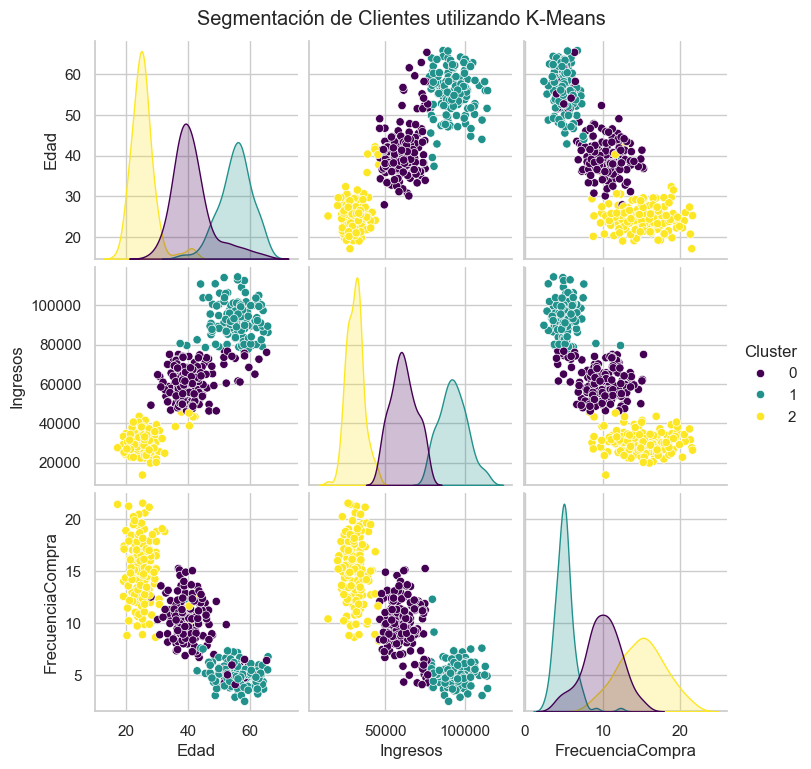

In [4]:
# Visualización de la segmentación utilizando un pairplot de Seaborn
sns.pairplot(df, hue='Cluster', vars=['Edad', 'Ingresos', 'FrecuenciaCompra'], palette='viridis')
plt.suptitle("Segmentación de Clientes utilizando K-Means", y=1.02)
plt.show()

### Explicación de la Visualización

La visualización se realiza mediante un **pairplot** de Seaborn, que muestra gráficos de dispersión entre cada par de variables (Edad, Ingresos y Frecuencia de Compra) y la distribución de cada variable. La opción `hue='Cluster'` colorea los datos según el grupo asignado por el algoritmo K-Means, lo que facilita la interpretación visual de los segmentos formados.

Este gráfico permite identificar de manera intuitiva las diferencias entre los grupos y verificar la efectividad de la segmentación.

## Conclusiones 

En este caso práctico se ha demostrado cómo aplicar técnicas de segmentación de clientes basadas en conceptos teóricos abordados en la lectura. A continuación se resumen los puntos clave 🔑:

✅ **Generación de Datos Sintéticos:** Se simularon tres segmentos de clientes utilizando distribuciones normales para variables relevantes (edad, ingresos y frecuencia de compra).

✅ **Aplicación de K-Means:** Se empleó el algoritmo K-Means para agrupar los datos sin etiquetas predefinidas, asignando cada cliente a un cluster basado en sus características.

✅ **Visualización e Interpretación:** El uso de gráficos permite observar la separación entre los grupos y evaluar la pertinencia de la segmentación para diseñar estrategias de marketing personalizadas.

La **segmentación de clientes** es una herramienta que nos permite **optimizar recursos** y **adaptar campañas**, facilitando así la toma de **decisiones en función de las características y comportamientos de cada grupo**. Al identificar grupos homogéneos dentro de una base de clientes, las empresas pueden personalizar sus ofertas, mejorar la experiencia del cliente y aumentar la efectividad de sus estrategias de marketing. Además, permite asignar recursos de manera más eficiente, focalizando los esfuerzos en los segmentos con mayor potencial de rentabilidad.

Este enfoque no solo optimiza los costos, sino que también promueve una mejor comprensión de las **necesidades y expectativas** de los clientes, lo que puede llevar a una mayor fidelización y satisfacción. A medida que los datos continúan creciendo, la segmentación se convierte en un proceso dinámico que debe revisarse y ajustarse constantemente para mantenerse alineado con las **tendencias del mercado** y los **cambios en el comportamiento del consumidor**.

En resumen, la segmentación de clientes es clave para desarrollar **estrategias** más precisas, mejorar la **competitividad** e **impulsar el crecimiento empresarial**.